In [1]:
import sys
sys.path.append('../') # or just install the module

In [2]:
import numpy as np

N = 200
class_names = ['a', 'b', 'c']
y_target = np.random.randint(0, len(class_names), size=(N))
y_pred_p = np.random.uniform(0, 1, size=(N, len(class_names)))
y_pred_p = y_pred_p/np.sum(y_pred_p, axis=1)[...,None]
print('y_target', y_target, y_target.shape)
print('y_pred_p', y_pred_p.shape)

y_target [0 0 1 0 2 2 0 1 2 0 2 2 2 2 0 2 0 0 0 1 1 2 2 0 2 2 0 0 1 0 1 1 0 1 2 2 1
 2 2 2 1 0 1 0 0 0 2 0 0 2 0 0 1 0 0 2 2 1 1 2 1 0 0 1 0 1 2 2 1 0 0 1 0 0
 0 0 0 0 1 0 2 0 1 2 1 1 1 0 1 0 2 2 0 1 2 2 0 2 2 1 1 1 1 0 0 2 1 1 2 2 1
 1 1 2 2 0 0 2 2 2 2 1 2 2 1 1 2 0 0 1 1 2 1 2 1 1 0 1 2 1 1 2 0 0 0 1 1 1
 2 2 1 2 0 1 0 1 2 0 2 0 2 2 2 0 2 2 0 2 2 0 0 1 1 1 0 0 2 1 1 0 0 0 0 2 0
 2 1 2 2 0 0 1 2 1 0 1 1 1 2 0] (200,)
y_pred_p (200, 3)


(<Figure size 480x400 with 2 Axes>,
 array([[[0.34285714, 0.4       , 0.25714286],
         [0.31746032, 0.25396825, 0.42857143],
         [0.34328358, 0.32835821, 0.32835821]]]))

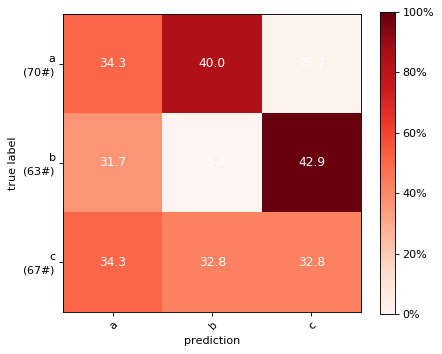

In [3]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
title = ''
#title += f'b-f1score={f1score_xe}'+'\n'
#title += f'b-accuracy={accuracy_xe}%'+'\n'
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':None,
}
#fig, ax = plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':'true',
}
plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)

In [4]:
y_pred_p, y_target

(array([[0.5446306 , 0.14270539, 0.31266401],
        [0.34168124, 0.23847335, 0.41984541],
        [0.5353908 , 0.09825119, 0.36635802],
        [0.37697924, 0.42092247, 0.20209829],
        [0.29874101, 0.49701496, 0.20424403],
        [0.12083989, 0.17959934, 0.69956077],
        [0.49624   , 0.1476756 , 0.3560844 ],
        [0.3575437 , 0.23262898, 0.40982732],
        [0.26239653, 0.12103428, 0.61656919],
        [0.54635084, 0.01777421, 0.43587495],
        [0.44597097, 0.23017421, 0.32385482],
        [0.39570946, 0.36102219, 0.24326835],
        [0.14190179, 0.11007868, 0.74801953],
        [0.53866952, 0.44548992, 0.01584056],
        [0.25861416, 0.03201765, 0.70936819],
        [0.09478038, 0.1971437 , 0.70807592],
        [0.34663553, 0.29923229, 0.35413218],
        [0.45373444, 0.15501213, 0.39125342],
        [0.22435239, 0.50787318, 0.26777443],
        [0.05836197, 0.41048012, 0.53115791],
        [0.24514484, 0.16303683, 0.59181833],
        [0.64223529, 0.04984289, 0

In [5]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
print(metrics_cdict[class_names[0]].keys())
print(metrics_dict.keys())
{c:metrics_cdict[c]['recall'] for c in class_names}
for k in metrics_dict.keys():
    if 'w-' in k:
        continue
    print(k, metrics_dict[k])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['precision', 'recall', 'f1score', 'accuracy', 'prc', 'aucpr', 'rocc', 'aucroc', 'xentropy'])
dict_keys(['b-precision', 'w-precision', 'b-recall', 'w-recall', 'b-f1score', 'w-f1score', 'b-accuracy', 'w-accuracy', 'b-aucpr', 'w-aucpr', 'b-aucroc', 'w-aucroc', 'b-xentropy', 'w-xentropy'])
b-precision 0.30966375579990363
b-recall 0.30839448915998013
b-f1score 0.308923351565503
b-accuracy 0.5399999730000014
b-aucpr 0.33508202770541967
b-aucroc 0.4852294469957787
b-xentropy 1.3517227981820643


In [6]:
from sklearn import metrics as skmetrics

precision, recall, f1score,_ = skmetrics.precision_recall_fscore_support(y_target, y_pred_p.argmax(axis=-1),
                average=None,
                labels=range(0, len(class_names)),
                )
print(np.mean(precision))
print(np.mean(recall))
print(np.mean(f1score))

0.3096638022011156
0.3083945352602069
0.3089283959875832


In [7]:
precision, recall, score,_ = skmetrics.precision_recall_fscore_support(
    np.array([0, 0, 0 ,1 ,0 ,1, 0, 0 ,0, 1, 0, 0, 1, 0, 0, 1 ,0, 0 ,0 ,1]).astype(bool),
    np.array([0 ,0, 1, 0 ,0, 1 ,1 ,0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ,0, 0 ,0]).astype(bool),
    average='binary', pos_label=1)
print(precision)

0.25


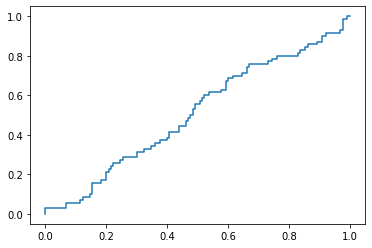

In [8]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['rocc']
plt.plot(rocc['fpr'], rocc['tpr'])

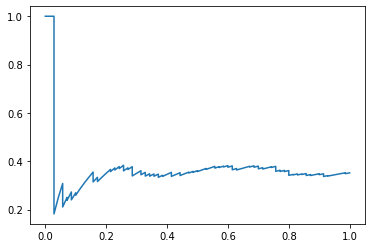

In [9]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['prc']
plt.plot(rocc['recall'], rocc['precision'])